# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [785]:
m=5
run = 1

1

Choose your grid

In [786]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false

global source=false

false

In [787]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [788]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [789]:
print(N)

1600.0

In [790]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [791]:
using Printf
include("./TMYangMillsTHREE.jl");

In [792]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.000625
the time step is 0.0003125


# Initial data of m β Ψ and Ψ,x

In [793]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.00886#0.08865958683658391#0.0884375
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [794]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

LoadError: syntax: extra token "were" after end of expression

In [795]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

1601×3 Matrix{Float64}:
 0.0          0.0           0.0
 2.49566e-14  2.44968e-11   7.09928e-10
 5.7767e-14   3.74274e-11   1.47496e-9
 9.40828e-14  4.61896e-11   2.29825e-9
 1.34282e-13  5.33665e-11   3.18306e-9
 1.78782e-13  5.9774e-11    4.13287e-9
 2.28045e-13  6.57845e-11   5.15128e-9
 2.82577e-13  7.16056e-11   6.24209e-9
 3.42941e-13  7.73695e-11   7.40929e-9
 4.09756e-13  8.31697e-11   8.65704e-9
 4.83704e-13  8.90781e-11   9.98972e-9
 5.65538e-13  9.51541e-11   1.14119e-8
 6.56085e-13  1.0145e-10    1.29284e-8
 ⋮                         
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.00144818   0.0041337    -5.19241e-17
 0.0014

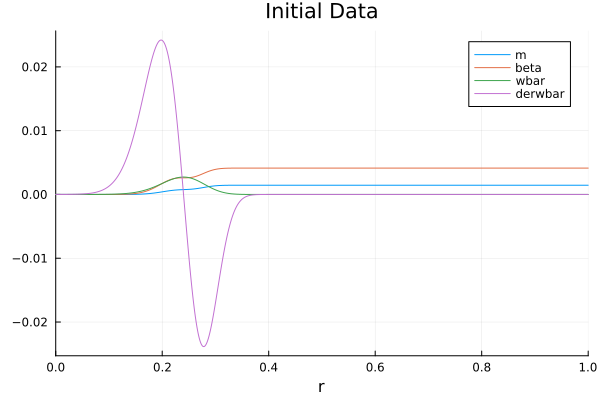

In [796]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [797]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [798]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [799]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [800]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.4005004691532729


In [801]:
using Base.Threads
Threads.nthreads()

4

In [802]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.0063390598082592835

In [803]:
dt=0.002/2^(m-1)

0.000125

 ## Time evolution

fixed grid

In [804]:
finaltime=1.25
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 10 dt is 0.000125, t=0.0012500000000000002 speed is 0.4993751953120317, dx/dt=5.0


iteration 20 dt is 0.000125, t=0.0025000000000000014 speed is 0.49937519531228924, dx/dt=5.0


iteration 30 dt is 0.000125, t=0.0037500000000000025 speed is 0.4993751953123816, dx/dt=5.0


iteration 40 dt is 0.000125, t=0.005000000000000004 speed is 0.49937519531242275, dx/dt=5.0


iteration 50 dt is 0.000125, t=0.006250000000000005 speed is 0.49937519531244096, dx/dt=5.0


iteration 60 dt is 0.000125, t=0.007500000000000006 speed is 0.49937519531244995, dx/dt=5.0


iteration 70 dt is 0.000125, t=0.008750000000000006 speed is 0.4993751953124553, dx/dt=5.0


iteration 80 dt is 0.000125, t=0.010000000000000007 speed is 0.4993751953124587, dx/dt=5.0


iteration 90 dt is 0.000125, t=0.011250000000000008 speed is 0.499375195312461, dx/dt=5.0


iteration 100 dt is 0.000125, t=0.01250000000000001 speed is 0.49937519531246244, dx/dt=5.0


iteration 110 dt is 0.000125, t=0.01375000000000001 speed is 



iteration 890 dt is 0.000125, t=0.11125000000000008 speed is 0.4993751953095592, dx/dt=5.0


iteration 900 dt is 0.000125, t=0.11250000000000009 speed is 0.4993751953093783, dx/dt=5.0


iteration 910 dt is 0.000125, t=0.11375000000000009 speed is 0.4993751953091866, dx/dt=5.0


iteration 920 dt is 0.000125, t=0.11500000000000009 speed is 0.499375195308984, dx/dt=5.0


iteration 930 dt is 0.000125, t=0.11625000000000009 speed is 0.49937519530876967, dx/dt=5.0


iteration 940 dt is 0.000125, t=0.11750000000000009 speed is 0.4993751953085429, dx/dt=5.0


iteration 950 dt is 0.000125, t=0.11875000000000009 speed is 0.49937519530830343, dx/dt=5.0


iteration 960 dt is 0.000125, t=0.12000000000000009 speed is 0.4993751953080501, dx/dt=5.0


iteration 970 dt is 0.000125, t=0.1212500000000001 speed is 0.49937519530778235, dx/dt=5.0


iteration 980 dt is 0.000125, t=0.1225000000000001 speed is 0.4993751953074995, dx/dt=5.0


iteration 990 dt is 0.000125, t=0.1237500000000001 speed is 0.499375



iteration 1770 dt is 0.000125, t=0.22124999999998948 speed is 0.4993751950529644, dx/dt=5.0


iteration 1780 dt is 0.000125, t=0.22249999999998935 speed is 0.49937519504198474, dx/dt=5.0


iteration 1790 dt is 0.000125, t=0.2237499999999892 speed is 0.4993751950306025, dx/dt=5.0


iteration 1800 dt is 0.000125, t=0.22499999999998907 speed is 0.4993751950188064, dx/dt=5.0


iteration 1810 dt is 0.000125, t=0.22624999999998893 speed is 0.49937519500658406, dx/dt=5.0


iteration 1820 dt is 0.000125, t=0.2274999999999888 speed is 0.4993751949939237, dx/dt=5.0


iteration 1830 dt is 0.000125, t=0.22874999999998866 speed is 0.49937519498081273, dx/dt=5.0


iteration 1840 dt is 0.000125, t=0.22999999999998852 speed is 0.4993751949672386, dx/dt=5.0


iteration 1850 dt is 0.000125, t=0.23124999999998838 speed is 0.4993751949531887, dx/dt=5.0


iteration 1860 dt is 0.000125, t=0.23249999999998824 speed is 0.4993751949386502, dx/dt=5.0


iteration 1870 dt is 0.000125, t=0.2337499999999881 speed



iteration 2650 dt is 0.000125, t=0.3312499999999774 speed is 0.4993751912001545, dx/dt=5.0


iteration 2660 dt is 0.000125, t=0.33249999999997726 speed is 0.4993751911152768, dx/dt=5.0


iteration 2670 dt is 0.000125, t=0.3337499999999771 speed is 0.49937519102980304, dx/dt=5.0


iteration 2680 dt is 0.000125, t=0.334999999999977 speed is 0.4993751909437731, dx/dt=5.0


iteration 2690 dt is 0.000125, t=0.33624999999997685 speed is 0.4993751908572279, dx/dt=5.0


iteration 2700 dt is 0.000125, t=0.3374999999999767 speed is 0.4993751907702102, dx/dt=5.0


iteration 2710 dt is 0.000125, t=0.33874999999997657 speed is 0.4993751906827644, dx/dt=5.0


iteration 2720 dt is 0.000125, t=0.33999999999997643 speed is 0.49937519059493685, dx/dt=5.0


iteration 2730 dt is 0.000125, t=0.3412499999999763 speed is 0.4993751905067751, dx/dt=5.0


iteration 2740 dt is 0.000125, t=0.34249999999997616 speed is 0.4993751904183287, dx/dt=5.0


iteration 2750 dt is 0.000125, t=0.343749999999976 speed is 0.



iteration 3530 dt is 0.000125, t=0.4412499999999653 speed is 0.4993751882539939, dx/dt=5.0


iteration 3540 dt is 0.000125, t=0.44249999999996514 speed is 0.4993751883481509, dx/dt=5.0


iteration 3550 dt is 0.000125, t=0.443749999999965 speed is 0.49937518844558354, dx/dt=5.0


iteration 3560 dt is 0.000125, t=0.44499999999996487 speed is 0.4993751885462183, dx/dt=5.0


iteration 3570 dt is 0.000125, t=0.44624999999996473 speed is 0.49937518864997704, dx/dt=5.0


iteration 3580 dt is 0.000125, t=0.4474999999999646 speed is 0.4993751887567763, dx/dt=5.0


iteration 3590 dt is 0.000125, t=0.44874999999996446 speed is 0.4993751888665274, dx/dt=5.0


iteration 3600 dt is 0.000125, t=0.4499999999999643 speed is 0.4993751889791369, dx/dt=5.0


iteration 3610 dt is 0.000125, t=0.4512499999999642 speed is 0.4993751890945066, dx/dt=5.0


iteration 3620 dt is 0.000125, t=0.45249999999996404 speed is 0.4993751892125329, dx/dt=5.0


iteration 3630 dt is 0.000125, t=0.4537499999999639 speed is 0



iteration 4410 dt is 0.000125, t=0.5512499999999759 speed is 0.4993751937348879, dx/dt=5.0


iteration 4420 dt is 0.000125, t=0.5524999999999763 speed is 0.49937519358686144, dx/dt=5.0


iteration 4430 dt is 0.000125, t=0.5537499999999768 speed is 0.49937519343269526, dx/dt=5.0


iteration 4440 dt is 0.000125, t=0.5549999999999772 speed is 0.499375193272505, dx/dt=5.0


iteration 4450 dt is 0.000125, t=0.5562499999999776 speed is 0.499375193106415, dx/dt=5.0


iteration 4460 dt is 0.000125, t=0.557499999999978 speed is 0.49937519293455745, dx/dt=5.0


iteration 4470 dt is 0.000125, t=0.5587499999999784 speed is 0.49937519275707304, dx/dt=5.0


iteration 4480 dt is 0.000125, t=0.5599999999999788 speed is 0.49937519257410984, dx/dt=5.0


iteration 4490 dt is 0.000125, t=0.5612499999999793 speed is 0.499375192385824, dx/dt=5.0


iteration 4500 dt is 0.000125, t=0.5624999999999797 speed is 0.49937519219237936, dx/dt=5.0


iteration 4510 dt is 0.000125, t=0.5637499999999801 speed is 0.499



iteration 5290 dt is 0.000125, t=0.6612500000000127 speed is 0.499375179863891, dx/dt=5.0


iteration 5300 dt is 0.000125, t=0.6625000000000131 speed is 0.49937517994283587, dx/dt=5.0


iteration 5310 dt is 0.000125, t=0.6637500000000135 speed is 0.4993751800291056, dx/dt=5.0


iteration 5320 dt is 0.000125, t=0.6650000000000139 speed is 0.4993751801225807, dx/dt=5.0


iteration 5330 dt is 0.000125, t=0.6662500000000143 speed is 0.4993751802231346, dx/dt=5.0


iteration 5340 dt is 0.000125, t=0.6675000000000147 speed is 0.49937518033063255, dx/dt=5.0


iteration 5350 dt is 0.000125, t=0.6687500000000152 speed is 0.49937518044493284, dx/dt=5.0


iteration 5360 dt is 0.000125, t=0.6700000000000156 speed is 0.49937518056588714, dx/dt=5.0


iteration 5370 dt is 0.000125, t=0.671250000000016 speed is 0.4993751806933397, dx/dt=5.0


iteration 5380 dt is 0.000125, t=0.6725000000000164 speed is 0.4993751808271288, dx/dt=5.0


iteration 5390 dt is 0.000125, t=0.6737500000000168 speed is 0.499



iteration 6170 dt is 0.000125, t=0.7712500000000494 speed is 0.49937519475486675, dx/dt=5.0


iteration 6180 dt is 0.000125, t=0.7725000000000498 speed is 0.499375194817184, dx/dt=5.0


iteration 6190 dt is 0.000125, t=0.7737500000000502 speed is 0.4993751948754243, dx/dt=5.0


iteration 6200 dt is 0.000125, t=0.7750000000000506 speed is 0.4993751949296484, dx/dt=5.0


iteration 6210 dt is 0.000125, t=0.7762500000000511 speed is 0.4993751949799205, dx/dt=5.0


iteration 6220 dt is 0.000125, t=0.7775000000000515 speed is 0.4993751950263081, dx/dt=5.0


iteration 6230 dt is 0.000125, t=0.7787500000000519 speed is 0.4993751950688822, dx/dt=5.0


iteration 6240 dt is 0.000125, t=0.7800000000000523 speed is 0.4993751951077166, dx/dt=5.0


iteration 6250 dt is 0.000125, t=0.7812500000000527 speed is 0.4993751951428885, dx/dt=5.0


iteration 6260 dt is 0.000125, t=0.7825000000000532 speed is 0.49937519517447715, dx/dt=5.0


iteration 6270 dt is 0.000125, t=0.7837500000000536 speed is 0.4993



iteration 7050 dt is 0.000125, t=0.8812500000000861 speed is 0.49937519368175093, dx/dt=5.0


iteration 7060 dt is 0.000125, t=0.8825000000000865 speed is 0.4993751936775013, dx/dt=5.0


iteration 7070 dt is 0.000125, t=0.883750000000087 speed is 0.4993751936742076, dx/dt=5.0


iteration 7080 dt is 0.000125, t=0.8850000000000874 speed is 0.4993751936718569, dx/dt=5.0


iteration 7090 dt is 0.000125, t=0.8862500000000878 speed is 0.4993751936704352, dx/dt=5.0


iteration 7100 dt is 0.000125, t=0.8875000000000882 speed is 0.4993751936699277, dx/dt=5.0


iteration 7110 dt is 0.000125, t=0.8887500000000886 speed is 0.4993751936703186, dx/dt=5.0


iteration 7120 dt is 0.000125, t=0.890000000000089 speed is 0.49937519367159117, dx/dt=5.0


iteration 7130 dt is 0.000125, t=0.8912500000000895 speed is 0.4993751936737282, dx/dt=5.0


iteration 7140 dt is 0.000125, t=0.8925000000000899 speed is 0.49937519367671135, dx/dt=5.0


iteration 7150 dt is 0.000125, t=0.8937500000000903 speed is 0.4993



iteration 7930 dt is 0.000125, t=0.9912500000001229 speed is 0.4993751948886442, dx/dt=5.0


iteration 7940 dt is 0.000125, t=0.9925000000001233 speed is 0.4993751949008389, dx/dt=5.0


iteration 7950 dt is 0.000125, t=0.9937500000001237 speed is 0.49937519491278487, dx/dt=5.0


iteration 7960 dt is 0.000125, t=0.9950000000001241 speed is 0.4993751949244829, dx/dt=5.0


iteration 7970 dt is 0.000125, t=0.9962500000001245 speed is 0.49937519493593385, dx/dt=5.0


iteration 7980 dt is 0.000125, t=0.997500000000125 speed is 0.49937519494713906, dx/dt=5.0


iteration 7990 dt is 0.000125, t=0.9987500000001254 speed is 0.49937519495809973, dx/dt=5.0


iteration 8000 dt is 0.000125, t=1.0000000000001257 speed is 0.4993751949688178, dx/dt=5.0


iteration 8010 dt is 0.000125, t=1.001250000000125 speed is 0.49937519497929467, dx/dt=5.0


iteration 8020 dt is 0.000125, t=1.0025000000001243 speed is 0.49937519498953226, dx/dt=5.0


iteration 8030 dt is 0.000125, t=1.0037500000001236 speed is 0.4



iteration 8820 dt is 0.000125, t=1.1025000000000689 speed is 0.49937519529985724, dx/dt=5.0


iteration 8830 dt is 0.000125, t=1.1037500000000682 speed is 0.4993751953004652, dx/dt=5.0


iteration 8840 dt is 0.000125, t=1.1050000000000675 speed is 0.4993751953010464, dx/dt=5.0


iteration 8850 dt is 0.000125, t=1.1062500000000668 speed is 0.4993751953016018, dx/dt=5.0


iteration 8860 dt is 0.000125, t=1.107500000000066 speed is 0.4993751953021324, dx/dt=5.0


iteration 8870 dt is 0.000125, t=1.1087500000000654 speed is 0.4993751953026394, dx/dt=5.0


iteration 8880 dt is 0.000125, t=1.1100000000000647 speed is 0.4993751953031233, dx/dt=5.0


iteration 8890 dt is 0.000125, t=1.111250000000064 speed is 0.49937519530358554, dx/dt=5.0


iteration 8900 dt is 0.000125, t=1.1125000000000633 speed is 0.4993751953040267, dx/dt=5.0


iteration 8910 dt is 0.000125, t=1.1137500000000626 speed is 0.49937519530444757, dx/dt=5.0


iteration 8920 dt is 0.000125, t=1.115000000000062 speed is 0.49937



iteration 9700 dt is 0.000125, t=1.212500000000008 speed is 0.4993751953124276, dx/dt=5.0


iteration 9710 dt is 0.000125, t=1.2137500000000072 speed is 0.4993751953124325, dx/dt=5.0


iteration 9720 dt is 0.000125, t=1.2150000000000065 speed is 0.49937519531243696, dx/dt=5.0


iteration 9730 dt is 0.000125, t=1.2162500000000058 speed is 0.4993751953124413, dx/dt=5.0


iteration 9740 dt is 0.000125, t=1.2175000000000051 speed is 0.4993751953124453, dx/dt=5.0


iteration 9750 dt is 0.000125, t=1.2187500000000044 speed is 0.499375195312449, dx/dt=5.0


iteration 9760 dt is 0.000125, t=1.2200000000000037 speed is 0.4993751953124525, dx/dt=5.0


iteration 9770 dt is 0.000125, t=1.221250000000003 speed is 0.4993751953124558, dx/dt=5.0


iteration 9780 dt is 0.000125, t=1.2225000000000024 speed is 0.4993751953124589, dx/dt=5.0


iteration 9790 dt is 0.000125, t=1.2237500000000017 speed is 0.49937519531246166, dx/dt=5.0


iteration 9800 dt is 0.000125, t=1.225000000000001 speed is 0.4993751

In [ ]:
mun